In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#โหลดฟังก์ชั่นที่เราเขียนไว้
from getData import *

# Empirical Rule

In [12]:
import os 

cwd = os.getcwd()
read_path = cwd +'/Data/egdata/'

ADVANC = pd.read_csv(read_path+'ADVANC.csv')
ADVANC = ADVANC.set_index(['Date'])
ADVANC_17_18 = ADVANC['2017':]

In [13]:
ADVANC_17_18["rets"] = ADVANC_17_18.Close.pct_change()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [4]:
np.percentile(ADVANC_17_18["rets"].dropna(),1)

-0.028362498777984156

In [5]:
ADVANC_17_18["rets"].dropna().quantile(0.01)

-0.028362498777984156

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


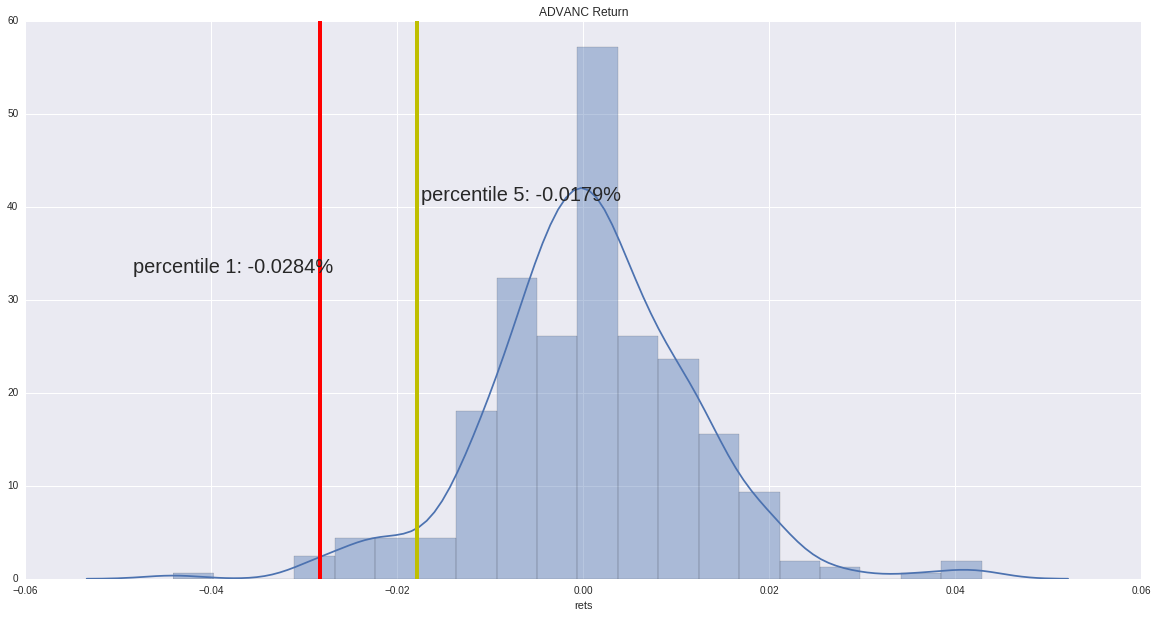

In [15]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20.0, 10.0)

ADVANC_17_18.dropna(inplace=True)

sns.distplot(ADVANC_17_18['rets'], bins=20)

p1 = np.percentile(ADVANC_17_18['rets'],1)
p5 = np.percentile(ADVANC_17_18['rets'],5)


plt.title("ADVANC Return")
plt.axvline(x=p1, linewidth=4, color='r')
plt.figtext(0.2, 0.55, "percentile 1: %.4f" % p1 + "%",fontsize=20)

plt.axvline(x=p5, linewidth=4, color='y')
plt.figtext(0.4, 0.65, "percentile 5: %.4f" % p5 + "%",fontsize=20)


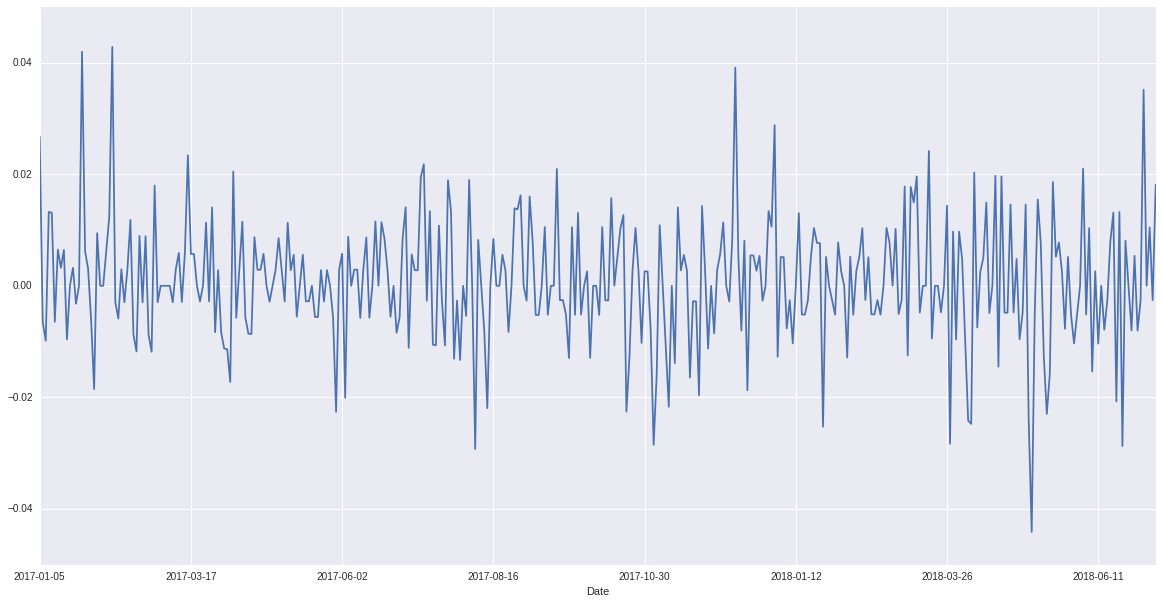

In [16]:
ADVANC_17_18["rets"].plot()

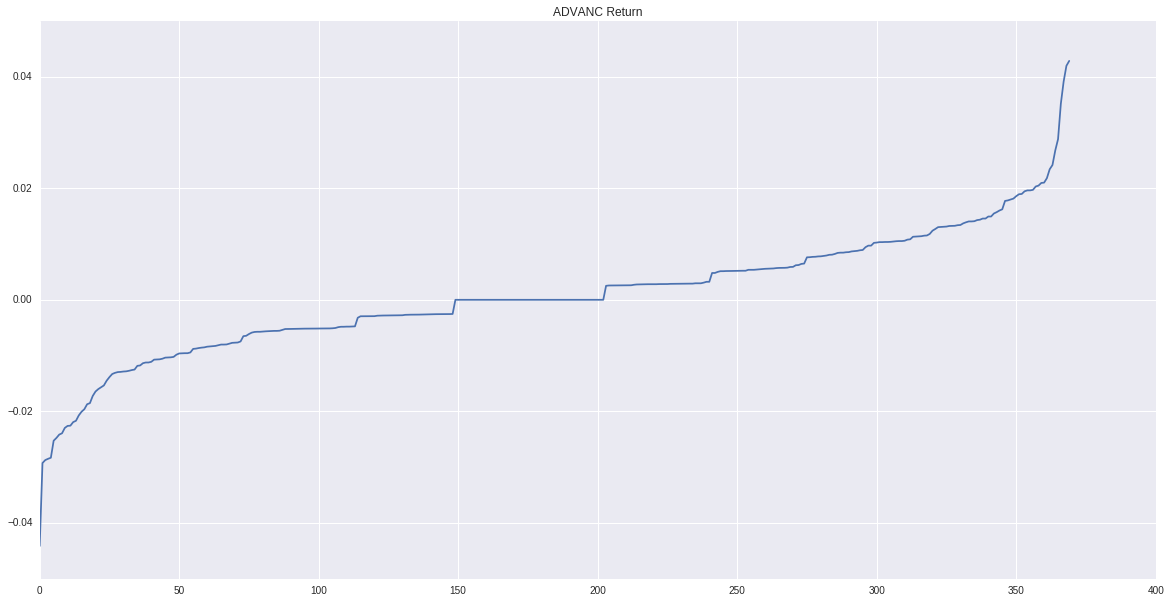

In [21]:
plt.plot(sorted(ADVANC_17_18["rets"]))
plt.title("ADVANC Return")

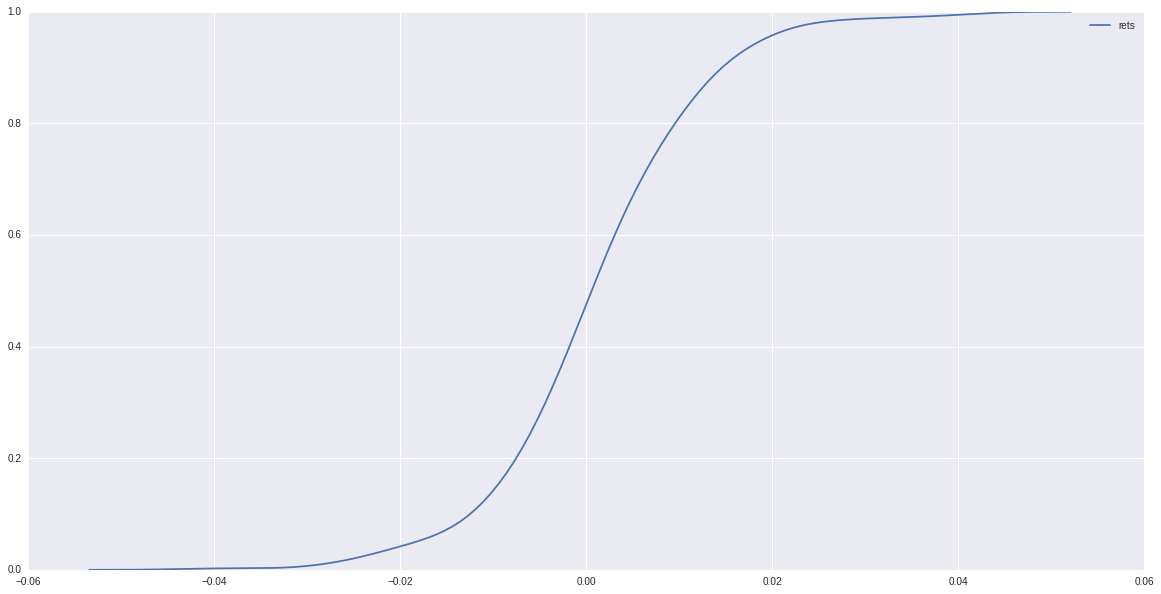

In [24]:
import seaborn as sns
sns.kdeplot(ADVANC_17_18["rets"], cumulative=True)

# Value at Risk

In [ ]:
from scipy.stats import norm

In [5]:
def var_cov_var(intial, confidence, mu, sigma):
    """
    Variance-Covariance calculation of daily Value-at-Risk
    using confidence level c, with mean of returns mu
    and standard deviation of returns sigma, on a portfolio
    of value P.
    """
    alpha = norm.ppf(1-confidence, mu, sigma)
    return intial - intial*(alpha + 1)


In [62]:
ADVANC_1718["rets"] = ADVANC_1718["Close"].pct_change()

intial = 100   
confidence = 0.95  # x% confidence interval
mu = np.mean(ADVANC_17_18["rets"])
sigma = np.std(ADVANC_17_18["rets"])

var = var_cov_var(intial, confidence, mu, sigma)
print("VaR: $%0.4f" % var)

VaR: $1.7459


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


ref

https://www.investopedia.com/terms/e/empirical-rule.asp

https://en.wikipedia.org/wiki/Standard_deviation#Rules_for_normally_distributed_data

http://breakingdownfinance.com/finance-topics/risk-management/market-risk/parametric-value-at-risk/